In [95]:
import os
import sys
import random
import numpy as np

sys.path.append("../")

In [96]:
from src.utils.utils import visualize
from src.transform.transform import transform
from src.dataset.road_dataset import RoadDataset

In [97]:
classes = ["lane", "crack", "pothole"]

In [98]:
dataset = RoadDataset(
    data_dir="/Users/riccardomusmeci/progetti/github/dataset/road-segmentation/Dataset",
    classes=classes,
    train=False,
    transform=transform(train=False, height=512, width=512, mean=[0, 0, 0], std=[1, 1, 1]),
)

In [99]:

colors = [
    np.array([0, 0, 0], dtype='uint8'),
    np.array([255, 255, 255], dtype='uint8'),
    np.array([127, 127, 127], dtype='uint8'),
]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


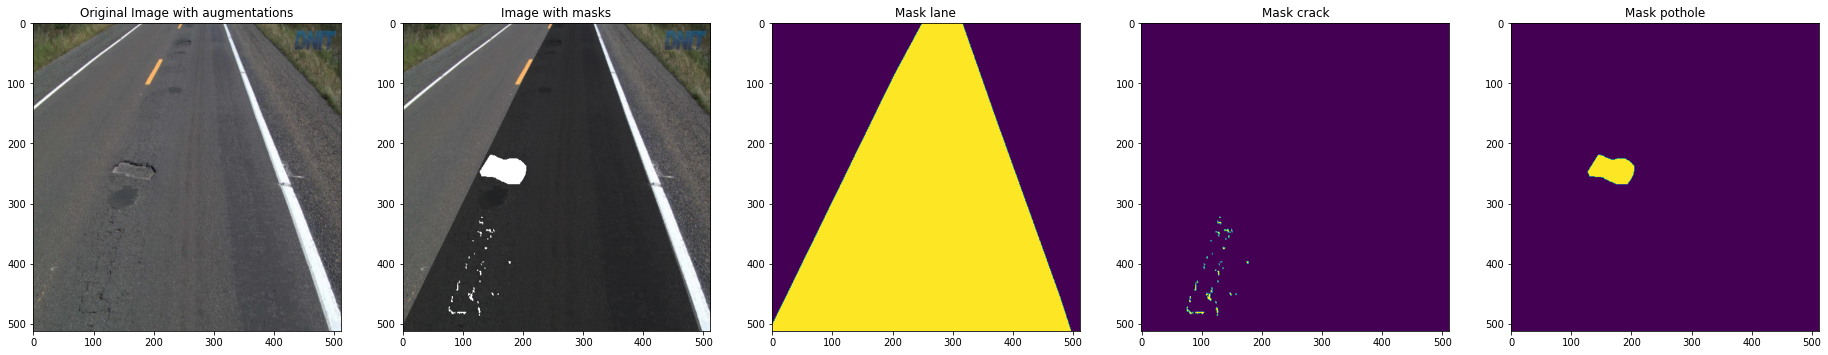

247 /Users/riccardomusmeci/progetti/github/dataset/road-segmentation/Dataset/val/916874_RS_290_290RS294095_17821/916874_RS_290_290RS294095_17821


In [100]:

image_idx = random.randint(0, len(dataset))
image_idx = 247
image, mask = dataset[image_idx]
image.shape, mask.shape

visualize(
    image=np.array(image).transpose(1, 2, 0),
    masks=np.array(mask).transpose(1, 2, 0),
    classes=classes,
    colors=colors
)
print(image_idx, dataset.images[image_idx])

In [101]:
from torchmetrics import JaccardIndex
from pytorch_toolbelt.losses import JaccardLoss

In [103]:
mask.shape

torch.Size([3, 512, 512])

In [102]:
loss_fn = JaccardLoss(mode="multilabel", from_logits=False)

In [108]:
loss_fn(mask, mask)

tensor(0.)

In [112]:
iou_fn = JaccardIndex(num_classes=2)

In [120]:
iou_fn(mask[1], mask[2])

tensor(0.4941)

In [41]:
import torch
from torchmetrics import JaccardIndex


In [43]:
target = torch.randint(0, 2, (10, 25, 25))
pred = torch.tensor(target)
# pred[2:5, 7:13, 9:15] = 1 - pred[2:5, 7:13, 9:15]
jaccard = JaccardIndex(num_classes=2)
jaccard(pred, target)

/var/folders/7m/lptk87z555zdlnjl_5y2w2dc0000gn/T/ipykernel_63131/318861374.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(target)


tensor(1.)

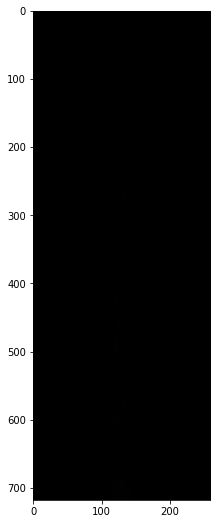

In [86]:
from src.io.io import read_rgb
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
mask = read_rgb("./img=103190_221716-bbox=[1662, 573, 260, 1436]-shape=(2, 1)-tile=0.png")
plt.imshow(mask)

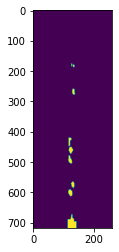

In [93]:
	
import cv2
# gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
gray = mask[..., 2]
plt.imshow(gray)

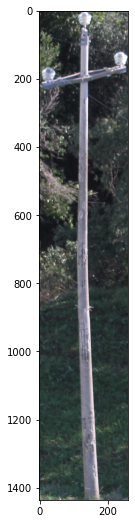

In [85]:
from src.io.io import read_rgb
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
image = read_rgb("./img=103190_221716-bbox=[1662, 573, 260, 1436].png")
plt.imshow(image)